<a href="https://colab.research.google.com/github/sofiaadina96/commentsections/blob/main/Commentsections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/commentsectionsdata.xlsx')

<ipython-input-3-c1d8a437e8cd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crosstab, x=crosstab.index, y='p', estimator=lambda x: sum(x) / len(df), palette=colors)


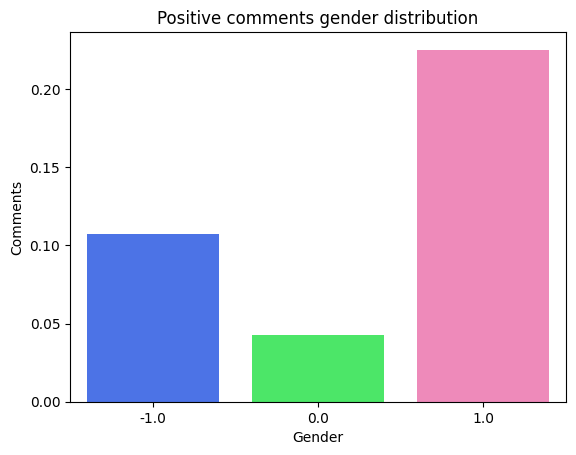

In [3]:
#plt.plot(x,y)
plt.xlabel('Gender')
plt.ylabel('Comments')
plt.title('Positive comments gender distribution')

# Create crosstabulation for negative comments and gender
crosstab = pd.crosstab(df['gender'], df['sentiment'])

# color palette for bars
colors = ['#3366FF', '#33FF57', '#FF79B9']

# visualize the results
sns.barplot(data=crosstab, x=crosstab.index, y='p', estimator=lambda x: sum(x) / len(df), palette=colors)


plt.show()

In [4]:
df

,username,comment,sentiment,followers,gender
0,k.caune_15,"I eat a whole pizza, wings, fries 4 sauces and...",n,13,-1.0
1,rebel_pburgess,🤮,n,145,-1.0
2,e_brown__,What are you eating? A whole fucking cow?,n,162,-1.0
3,_swabu,Not a flex,n,58,0.0
4,777__media,No it’s not 💀,n,48000,1.0
...,...,...,...,...,...
537,halfthewoman_i_used_to_be,The most important weight you'll ever need to ...,p,18,1.0
538,anthonyfield_19,omg marry me,x,394,-1.0
539,duckduckgoose1984,"She looks so amazing in “Recovery,” green is h...",x,298,-1.0
540,certified_cisneros,Comments boutta be a bigger slaughter than the...,x,1719,-1.0


<ipython-input-10-7e1ca9975a5a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='gender', y='sentiment', inner='box', palette=custom_palette)


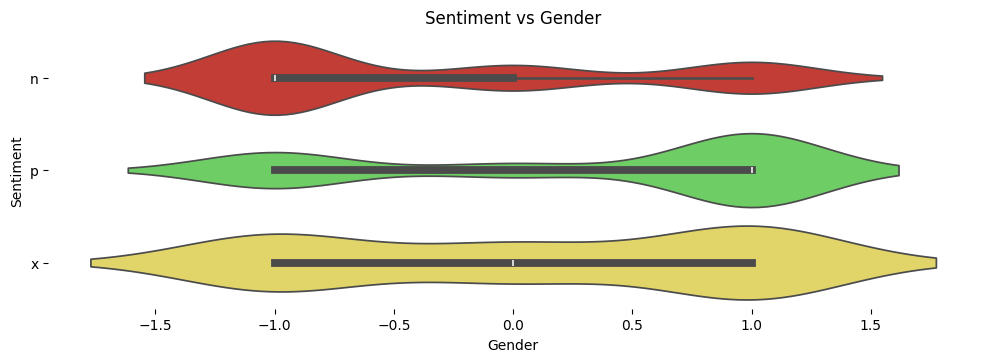

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

# Removing whitespace from the 'sentiment' column ('p ' becomes 'p')
df['sentiment'] = df['sentiment'].str.strip()

# Custom color palette
custom_palette = {'p': '#5fe053', 'x': '#f5e556', 'n': '#db281f'}

# Plotting
figsize = (12, 1.2 * len(df['sentiment'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data=df, x='gender', y='sentiment', inner='box', palette=custom_palette)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title("Sentiment vs Gender")
plt.xlabel("Gender")
plt.ylabel("Sentiment")
plt.show()

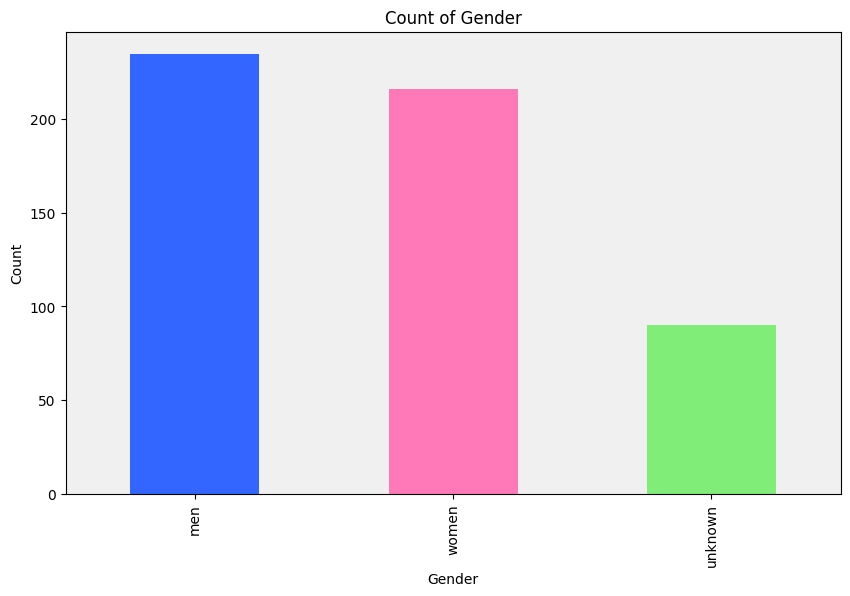

In [ ]:
# Map original values to desired names
gender_map = {-1: 'men', 1: 'women', 0: 'unknown'}

# Replace values in the 'gender' column with the mapped names
df['gender'] = df['gender'].replace(gender_map)

# Calculate the count of each gender value
gender_counts = df['gender'].value_counts()

# color palette for bars
colors = ['#3366FF', '#FF79B9', '#81ED79']

# Create bar plot
plt.figure(figsize=(10, 6))  # Adjust size as needed
gender_counts.plot(kind='bar', color=colors)

# Background color
plt.gca().set_facecolor('#F0F0F0')

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')

# Show plot
plt.show()

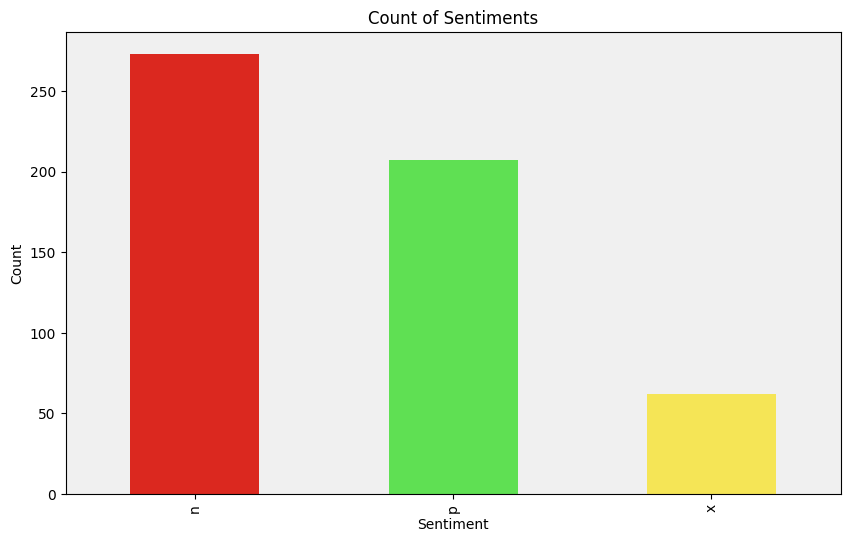

In [ ]:
# Strip leading and trailing whitespace from the 'sentiment' column
#(because we had both values "p " and "p" as a mistake )
df['sentiment'] = df['sentiment'].str.strip()

# Calculate the count of each sentiment value
sentiment_counts = df['sentiment'].value_counts()

# color palette for bars
sentimentcolors = ['#db281f', '#5fe053', '#f5e556']

# Create bar plot
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind='bar', color=sentimentcolors)

# Background color
plt.gca().set_facecolor('#F0F0F0')

# Set labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of Sentiments')

# Show plot
plt.show()

# Correlation

Here are the calculations of chi-square value between different variables.

In [ ]:
#Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency

import numpy as np

Gender and sentiment:

In [ ]:
# Contingency table of gender and sentiment
crosstab = pd.crosstab(df['gender'], df['sentiment'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 66.99009251993174
p-value: 1.6909646713563267e-12


Followers and sentiment:

In [ ]:
# Contingency table of gender and sentiment
crosstab = pd.crosstab(df['sentiment'], df['followers'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 842.236883308963
p-value: 0.10507162556571552


Followers and gender:

In [ ]:
# Contingency table of gender and sentiment
crosstab = pd.crosstab(df['gender'], df['followers'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 803.4027125783332
p-value: 0.38137480360344655


Gender and length of comments

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Function defining categories for comment lengths
def categorize_comment_length(comment):
    if len(comment) < 30:
        return 'Short'
    elif 30 <= len(comment) < 70:
        return 'Medium'
    else:
        return 'Long'

df['comment_length_category'] = df['comment'].apply(categorize_comment_length)

# Contingency table of 'sentiment' and 'comment_length_category'
contingency_table = pd.crosstab(df['sentiment'], df['comment_length_category'])

# chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Expected frequencies:\n", expected)

NameError: name 'df' is not defined

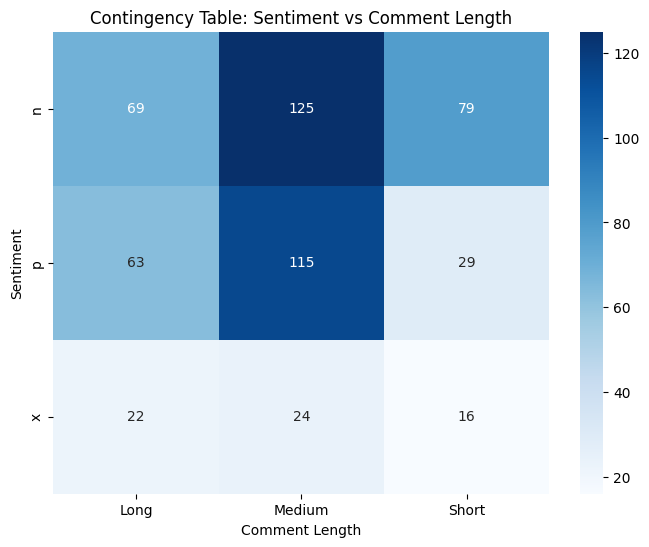

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of observed frequencies
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Contingency Table: Sentiment vs Comment Length")
plt.xlabel("Comment Length")
plt.ylabel("Sentiment")
plt.show()